In [1]:
import pandas as pd

# Load the engineered dataset
df = pd.read_csv('technical_support_data_engineered.csv')

# Re-convert your time columns to datetime objects
time_cols_to_convert = [
    'Created time', 'Expected SLA to resolve', 'Expected SLA to first response',
    'First response time', 'Resolution time', 'Close time'
]
for col in time_cols_to_convert:
    # Use errors='coerce' to turn unparseable dates into NaT (Not a Time)
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Check the dtypes to confirm
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 40 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Status                                    2330 non-null   object        
 1   Ticket ID                                 2330 non-null   int64         
 2   Priority                                  2330 non-null   object        
 3   Source                                    2330 non-null   object        
 4   Topic                                     2330 non-null   object        
 5   Agent Group                               2330 non-null   object        
 6   Agent Name                                2330 non-null   object        
 7   Created time                              2330 non-null   datetime64[ns]
 8   Expected SLA to resolve                   2330 non-null   datetime64[ns]
 9   Expected SLA to first response

Core Objectives:
- Assess Overall Performance: Establish baseline metrics for response times, resolution times, SLA compliance, and customer satisfaction.

- Identify Bottlenecks: Pinpoint specific channels, topics, or priorities that lead to longer resolution times or lower satisfaction.


- Understand Customer Behavior: Analyze when customers contact support and for what reasons.

- Evaluate Operational Efficiency: Examine agent performance patterns and workload distribution.

- Uncover Drivers of Satisfaction: Investigate what factors contribute to higher or lower CSAT scores.


Key Steps:

- Overall Performance Metrics: Calculate average response times, resolution times, SLA compliance rates, and CSAT scores across the entire dataset to establish baselines.

- Analysis by Categorical Variables: Deep dive into how performance metrics (duration, SLA, CSAT) vary across different Source, Priority, Topic, Product group, Agent Group, and Support Level.

- Time-Based Analysis: Explore trends and patterns related to Created_Day_of_Week, Created_Hour_of_Day, FirstResponse_Hour_of_Day, Resolution_Hour_of_Day to identify peak periods and optimal staffing.

- Relationship Exploration: Investigate correlations between variables like Agent interactions and Resolution_Duration, or Resolution_Duration and Survey results.

- Agent Performance Overview: (Aggregated and anonymized) Analyze performance differences between Agent Group to inform training or resource allocation.

- Data Visualization: Use appropriate charts (bar charts, line charts, box plots, heatmaps) to effectively communicate our findings.

In [2]:
# Calculate Overall Performance Metrics


print("--- Overall Performance Metrics for SwiftConnect Telecom ---")

# 1. Overall Average First Response Time
avg_first_response = df['Actual_First_Response_Duration_Minutes'].mean()
print(f"Overall Average First Response Time: {avg_first_response:.2f} minutes")

# 2. Overall Average Resolution Time
avg_resolution_time = df['Actual_Resolution_Duration_Minutes'].mean()
print(f"Overall Average Resolution Time: {avg_resolution_time:.2f} minutes")

# 3. Overall First Response SLA Compliance Rate
first_response_sla_compliance = df['First_Response_SLA_Met'].mean() * 100
print(f"Overall First Response SLA Compliance: {first_response_sla_compliance:.2f}%")

# 4. Overall Resolution SLA Compliance Rate
resolution_sla_compliance = df['Resolution_SLA_Met'].mean() * 100
print(f"Overall Resolution SLA Compliance: {resolution_sla_compliance:.2f}%")

# 5. Overall Average CSAT Score
avg_csat = df['Survey results'].mean()
print(f"Overall Average CSAT Score: {avg_csat:.2f} (on a 1-5 scale)")

print("--------------------------------------------------")

--- Overall Performance Metrics for SwiftConnect Telecom ---
Overall Average First Response Time: 26.07 minutes
Overall Average Resolution Time: 1994.28 minutes
Overall First Response SLA Compliance: 86.65%
Overall Resolution SLA Compliance: 66.39%
Overall Average CSAT Score: 3.51 (on a 1-5 scale)
--------------------------------------------------


In [34]:
# calculate Overall Performance Metrics and store them in variables
overall_avg_first_response = df['Actual_First_Response_Duration_Minutes'].mean()
overall_avg_resolution_time = df['Actual_Resolution_Duration_Minutes'].mean()
overall_first_response_sla_compliance = df['First_Response_SLA_Met'].mean() * 100
overall_resolution_sla_compliance = df['Resolution_SLA_Met'].mean() * 100
overall_avg_csat = df['Survey results'].mean()

# Define a helper function for consistent plotting
def plot_performance_metrics(data_df, group_col, metric_col, metric_label, overall_avg_value, title_prefix, y_limit=None):
    """
    Generates a bar plot for a given metric, grouped by a categorical column,
    with an overall average reference line.
    """
    plt.figure(figsize=(6, 4))
    sns.barplot(x=data_df.index, y=metric_col, data=data_df)

    # Add overall average line
    plt.axhline(overall_avg_value, color='red', linestyle='--',
                label=f'Overall Avg {metric_label}: {overall_avg_value:.2f}')

    plt.title(f'{title_prefix} {metric_label} by {group_col.replace("_", " ").title()}')
    plt.xlabel(group_col.replace("_", " ").title())
    plt.ylabel(f'Average {metric_label}')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    if y_limit:
        plt.ylim(y_limit) # Set custom y-axis limit if provided
    plt.tight_layout()
    plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

**Key insights into SwiftConnect Telecom's customer support performance:**

- Overall Average First Response Time: 26.07 minutes
> Less than half an hour for an initial response is generally considered responsive in many support operations.

- Overall Average Resolution Time: 1994.28 minutes
> Approximately 33.24 hours (1994.28 / 60) or about 1.38 days (33.24 / 24). 
> This is a significant amount of time. Depending on the complexity of telecom issues, this could be a concern for customer experience.

- Overall First Response SLA Compliance: 86.65%
> Decent compliance rate. Roughly 86.65% of tickets receive their first response within the agreed-upon SLA. There's room for improvement.

- Overall Resolution SLA Compliance: 66.39%
> Quite low and a major red flag! Only about two-thirds of tickets are resolved within their promised SLA. 
> This directly correlates with the long average resolution time and indicates significant operational challenges or unrealistic SLA targets.

- Overall Average CSAT Score: 3.51 (on a 1-5 scale)
> A score of 3.51 (out of 5) is mediocre. It suggests that while some customers are satisfied, a significant portion are neutral or dissatisfied. 
> This aligns with the lower resolution SLA compliance and potentially long resolution times. Definitely need to understand what drives this score up or down.

**Initial Takeaways:**
> **SwiftConnect appears to be good at initial responses, but struggles significantly with resolving issues quickly and within their stated agreements, which is likely impacting customer satisfaction.**

Analyzing these metrics by key categorical variables. This helps identify where these issues are stemming from.


--- Performance Metrics by Source (Channel) ---
        Avg_First_Response_Minutes  Avg_Resolution_Minutes  \
Source                                                       
chat                          1.94                 1661.09   
email                        48.39                 2163.21   
phone                        -1.65                 2312.15   

        First_Response_SLA_Compliance  Resolution_SLA_Compliance  Avg_CSAT  
Source                                                                      
chat                            84.00                      63.53      3.54  
email                           90.76                      68.72      3.51  
phone                           75.20                      64.63      3.42  
---------------------------------------------

--- Visualizing Performance by Source (Channel) ---


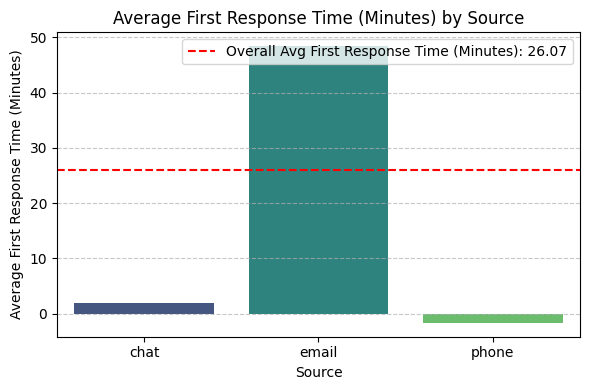

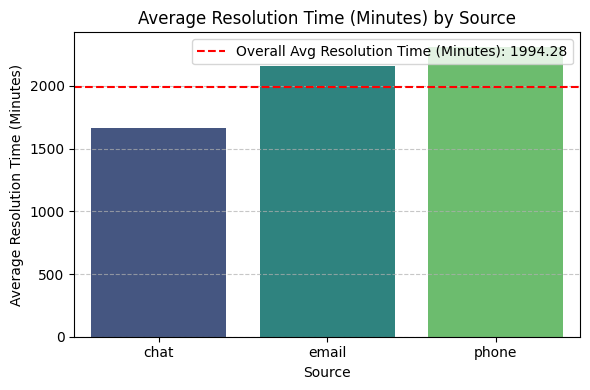

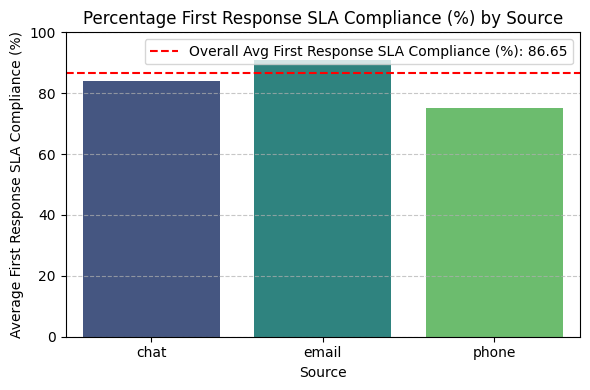

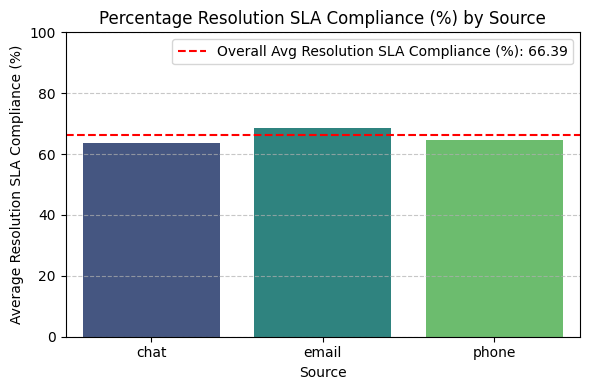

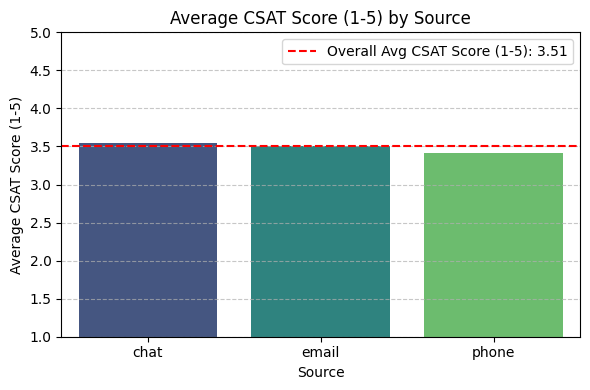

In [ ]:
# Analyze Performance by "Source" - check if certain channels are more efficient or satisfying than others

# Group by 'Source' and calculate the mean for key metrics
source_performance = df.groupby('Source').agg(
    Avg_First_Response_Minutes=('Actual_First_Response_Duration_Minutes', 'mean'),
    Avg_Resolution_Minutes=('Actual_Resolution_Duration_Minutes', 'mean'),
    First_Response_SLA_Compliance=('First_Response_SLA_Met', lambda x: x.mean() * 100),
    Resolution_SLA_Compliance=('Resolution_SLA_Met', lambda x: x.mean() * 100),
    Avg_CSAT=('Survey results', 'mean')
).round(2) # Round to 2 decimal places for cleaner output

print("\n--- Performance Metrics by Source (Channel) ---")
print(source_performance)
print("---------------------------------------------")


**Observations on Performance by Source:**

1 - Email Channel:

- Avg_First_Response_Minutes: 48.39 minutes. This is higher than chat, but might be acceptable for email as it's not real-time.
- First_Response_SLA_Compliance: 90.76%. Very good compliance for first response.
- Avg_Resolution_Minutes: 2163.21 minutes (approx. 36 hours / 1.5 days). Still quite long, similar to the overall average.
- Resolution_SLA_Compliance: 68.72%. Slightly better than overall, but still low.
- Avg_CSAT: 3.51. Matches the overall average.

2 - Chat Channel:

- Avg_First_Response_Minutes: 1.94 minutes. This is excellent! As expected for a real-time channel.
- First_Response_SLA_Compliance: 84.00%. Good, though slightly lower than email, which is interesting for a real-time channel.
- Avg_Resolution_Minutes: 1661.09 minutes (approx. 27.7 hours / 1.15 days). This is the lowest resolution time among the channels – a positive sign!
- Resolution_SLA_Compliance: 63.53%. Lower than email, and still quite low overall.
- Avg_CSAT: 3.54. Slightly higher than email and phone, suggesting a marginally better experience.

3 - Phone Channel:

- Avg_First_Response_Minutes for phone is -1.65 minutes. This is impossible, as it indicates some phone tickets, the First response time timestamp is earlier than the Created time timestamp. 
- This is a data quality issue that needs to be investigated and addressed

In [5]:
#  Investigate and Address the Negative Response Times for Phone Source

# Filter for phone source and negative first response duration
anomalous_phone_responses = df[(df['Source'] == 'phone') & (df['Actual_First_Response_Duration_Minutes'] < 0)]

print(f"\nNumber of phone tickets with negative first response time: {len(anomalous_phone_responses)}")
print("\nFirst 5 anomalous phone responses:")
print(anomalous_phone_responses[['Created time', 'First response time', 'Actual_First_Response_Duration_Minutes']].head())


Number of phone tickets with negative first response time: 2

First 5 anomalous phone responses:
           Created time     First response time  \
229 2023-02-01 19:56:22 2023-02-01 01:10:53.759   
892 2023-05-18 05:54:00 2023-05-17 20:19:49.433   

     Actual_First_Response_Duration_Minutes  
229                            -1125.470683  
892                             -574.176117  


In [6]:
# Set any negative Actual_First_Response_Duration_Minutes to 0
df.loc[df['Actual_First_Response_Duration_Minutes'] < 0, 'Actual_First_Response_Duration_Minutes'] = 0

# Verify the change by checking for negative values again
print("\nNumber of phone tickets with negative first response time after correction:")
print(len(df[(df['Source'] == 'phone') & (df['Actual_First_Response_Duration_Minutes'] < 0)]))

# Also, check the min value for the column to ensure no negatives remain overall
print("\nMinimum value for Actual_First_Response_Duration_Minutes after correction:")
print(df['Actual_First_Response_Duration_Minutes'].min())


Number of phone tickets with negative first response time after correction:
0

Minimum value for Actual_First_Response_Duration_Minutes after correction:
0.0


In [59]:

output_file_path_engineered = 'technical_support_data_engineered.csv'
df.to_csv(output_file_path_engineered, index=False)
print(f"Corrected engineered dataset saved successfully to: {output_file_path_engineered}")

Corrected engineered dataset saved successfully to: technical_support_data_engineered.csv


The negative values are handled, rerun "Performance Metrics by Source (Channel)"


--- Performance Metrics by Source (Channel) (REVISED) ---
        Avg_First_Response_Minutes  Avg_Resolution_Minutes  \
Source                                                       
chat                          1.94                 1661.09   
email                        48.39                 2163.21   
phone                         5.26                 2312.15   

        First_Response_SLA_Compliance  Resolution_SLA_Compliance  Avg_CSAT  
Source                                                                      
chat                            84.00                      63.53      3.54  
email                           90.76                      68.72      3.51  
phone                           75.20                      64.63      3.42  
-------------------------------------------------------

--- Visualizing Performance by Source (Channel) (REVISED) ---


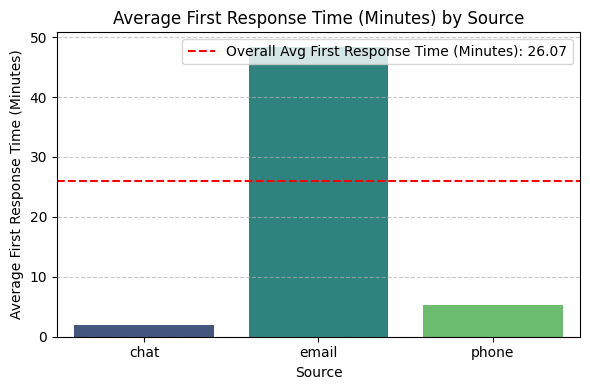

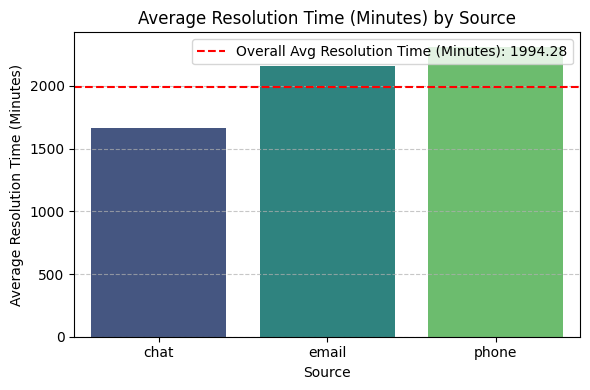

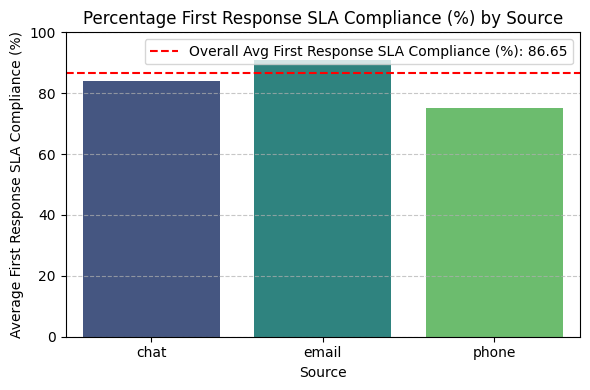

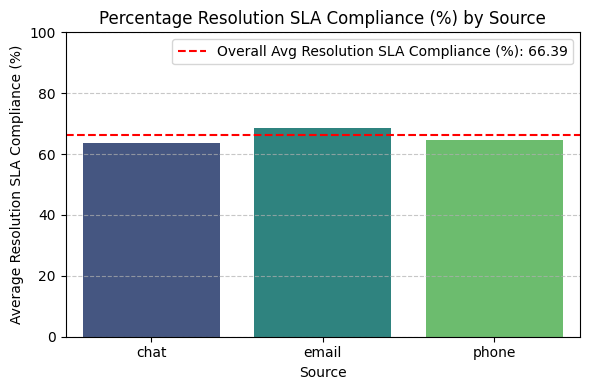

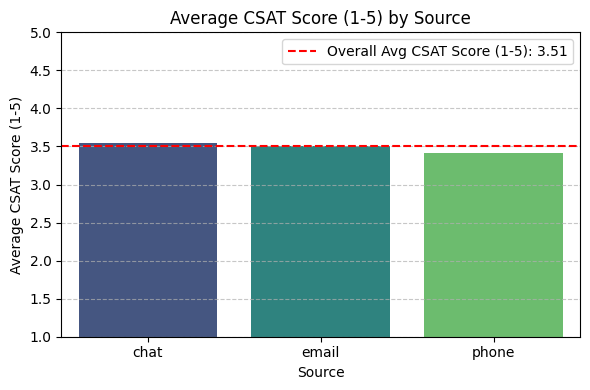

In [10]:
# Group by 'Source' and calculate the mean for key metrics
source_performance = df.groupby('Source').agg(
    Avg_First_Response_Minutes=('Actual_First_Response_Duration_Minutes', 'mean'),
    Avg_Resolution_Minutes=('Actual_Resolution_Duration_Minutes', 'mean'),
    First_Response_SLA_Compliance=('First_Response_SLA_Met', lambda x: x.mean() * 100),
    Resolution_SLA_Compliance=('Resolution_SLA_Met', lambda x: x.mean() * 100),
    Avg_CSAT=('Survey results', 'mean')
).round(2) # Round to 2 decimal places for cleaner output

print("\n--- Performance Metrics by Source (Channel) (REVISED) ---")
print(source_performance)
print("-------------------------------------------------------")

print("\n--- Visualizing Performance by Source (Channel) (REVISED) ---")

plot_performance_metrics(source_performance, 'Source', 'Avg_First_Response_Minutes', 'First Response Time (Minutes)', overall_avg_first_response, 'Average')
plot_performance_metrics(source_performance, 'Source', 'Avg_Resolution_Minutes', 'Resolution Time (Minutes)', overall_avg_resolution_time, 'Average')
plot_performance_metrics(source_performance, 'Source', 'First_Response_SLA_Compliance', 'First Response SLA Compliance (%)', overall_first_response_sla_compliance, 'Percentage', y_limit=(0, 100))
plot_performance_metrics(source_performance, 'Source', 'Resolution_SLA_Compliance', 'Resolution SLA Compliance (%)', overall_resolution_sla_compliance, 'Percentage', y_limit=(0, 100))
plot_performance_metrics(source_performance, 'Source', 'Avg_CSAT', 'CSAT Score (1-5)', overall_avg_csat, 'Average', y_limit=(1, 5)) # CSAT is 1-5 scale

Based on the based line average metrics, the performance on each source are:

| Metric                        | Chat (real-time)          | Email (asynchronous)        | Phone (real-time/direct)     | Overall Context (from previous step) |
| :---------------------------- | :------------------------ | :-------------------------- | :--------------------------- | :----------------------------------- |
| Avg_First_Response_Minutes    | 1.94 (Excellent)          | 48.39 (Expected for email)  | 5.26 (Good)                  | 26.07 mins                           |
| First_Response_SLA_Compliance | 84.00%                    | 90.76% (Best)               | 75.20% (Lowest)              | 86.65%                               |
| Avg_Resolution_Minutes        | 1661.09 (Fastest) (27.7 hrs) | 2163.21 (Mid-range) (36.0 hrs) | 2312.15 (Slowest) (38.5 hrs) | 1994.28 mins (33.2 hrs)              |
| Resolution_SLA_Compliance     | 63.53%                    | 68.72% (Best)               | 64.63%                       | 66.39%                               |
| Avg_CSAT                      | 3.54 (Highest)            | 3.51                        | 3.42 (Lowest)                | 3.51                                 |


**Key Insights from Channel Analysis:**

**1 - Chat Channel:** Appears to be the most efficient in terms of actual resolution time and yields the highest customer satisfaction. First response is near instantaneous. Its First Response SLA compliance is decent, but not the best, which is somewhat surprising given its speed.

**2 - Email Channel:** While having a longer average first response time (as expected for email communication), it boasts the highest First Response SLA compliance and the highest Resolution SLA compliance. This suggests a disciplined and effective workflow for email.

**3 - Phone Channel:** A good average first response time (5.26 minutes) after correction. However, it has the lowest First Response SLA compliance, the slowest average resolution time, and the lowest average CSAT score. This is a clear area of concern for SwiftConnect. Customers calling in are experiencing longer waits to be fully resolved and are least satisfied.

**Recommendations for SwiftConnect (based on Source):**

> Investigate Phone Channel: Deep dive into why phone calls take longer to resolve and lead to lower satisfaction. Is it agent training? Complexity of issues? High volume leading to rushed service or poor notes?

> Promote Chat: Given its efficiency and higher CSAT, encourage more customers to use the chat channel where appropriate.

> Learn from Email: Understand the processes and training that contribute to Email's strong SLA compliance and see if those best practices can be applied to other channels.



--- Performance Metrics by Priority ---
          Avg_First_Response_Minutes  Avg_Resolution_Minutes  \
Priority                                                       
high                           22.68                 1989.98   
low                            25.25                 1935.46   
medium                         31.75                 2091.79   

          First_Response_SLA_Compliance  Resolution_SLA_Compliance  Avg_CSAT  
Priority                                                                      
high                              88.22                      69.71      3.66  
low                               85.82                      66.11      3.44  
medium                            87.12                      64.96      3.54  
-------------------------------------

--- Visualizing Performance by Priority ---


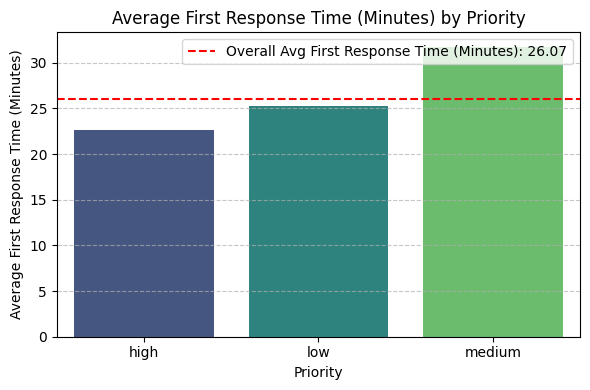

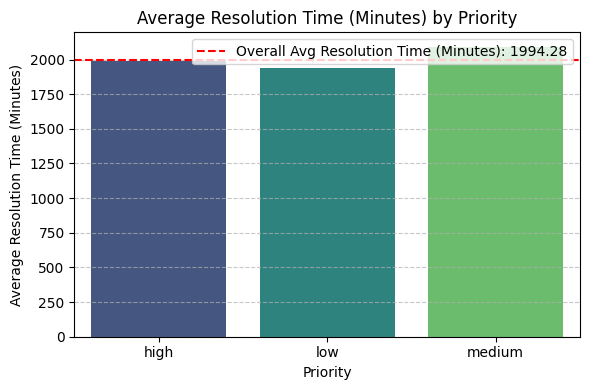

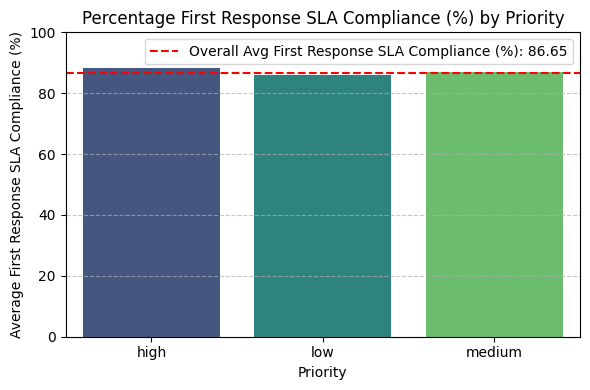

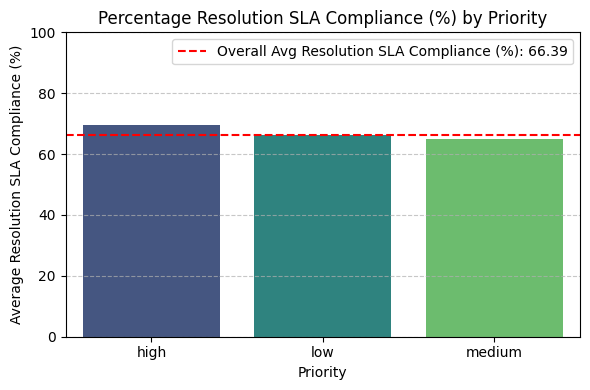

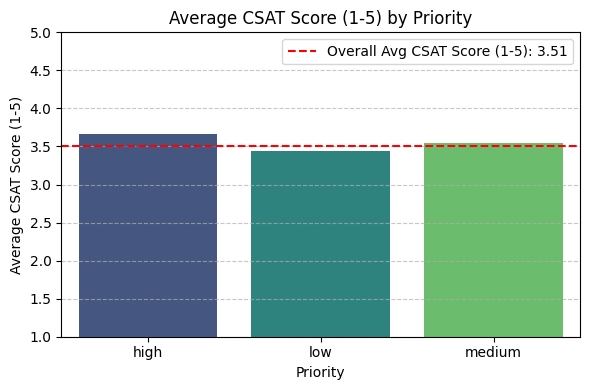

In [11]:
# Analyze Performance by "Priority" - check if  higher-priority tickets are truly being handled with the urgency they require.

# Group by 'Priority' and calculate the mean for key metrics
priority_performance = df.groupby('Priority').agg(
    Avg_First_Response_Minutes=('Actual_First_Response_Duration_Minutes', 'mean'),
    Avg_Resolution_Minutes=('Actual_Resolution_Duration_Minutes', 'mean'),
    First_Response_SLA_Compliance=('First_Response_SLA_Met', lambda x: x.mean() * 100),
    Resolution_SLA_Compliance=('Resolution_SLA_Met', lambda x: x.mean() * 100),
    Avg_CSAT=('Survey results', 'mean')
).round(2) # Round to 2 decimal places

print("\n--- Performance Metrics by Priority ---")
print(priority_performance)
print("-------------------------------------")

print("\n--- Visualizing Performance by Priority ---")

plot_performance_metrics(priority_performance, 'Priority', 'Avg_First_Response_Minutes', 'First Response Time (Minutes)', overall_avg_first_response, 'Average')
plot_performance_metrics(priority_performance, 'Priority', 'Avg_Resolution_Minutes', 'Resolution Time (Minutes)', overall_avg_resolution_time, 'Average')
plot_performance_metrics(priority_performance, 'Priority', 'First_Response_SLA_Compliance', 'First Response SLA Compliance (%)', overall_first_response_sla_compliance, 'Percentage', y_limit=(0, 100))
plot_performance_metrics(priority_performance, 'Priority', 'Resolution_SLA_Compliance', 'Resolution SLA Compliance (%)', overall_resolution_sla_compliance, 'Percentage', y_limit=(0, 100))
plot_performance_metrics(priority_performance, 'Priority', 'Avg_CSAT', 'CSAT Score (1-5)', overall_avg_csat, 'Average', y_limit=(1, 5))


Based on the based line average metrics, the performance on each Priority are:

| Metric                        | High Priority                  | Low Priority                 | Medium Priority                | Overall Context                                                                 |
| :---------------------------- | :----------------------------- | :--------------------------- | :----------------------------- | :------------------------------------------------------------------------------ |
| Avg_First_Response_Minutes    | 22.68 (Fastest)                | 25.25                        | 31.75 (Slowest)                | Overall: 26.07 mins. **Unexpected: Medium is slowest!** |
| First_Response_SLA_Compliance | 88.22% (Best)                  | 85.82%                       | 87.12%                         | Overall: 86.65%                                                                 |
| Avg_Resolution_Minutes        | 1989.98 (Mid-range) (33.17 hrs) | 1935.46 (Fastest) (32.26 hrs) | 2091.79 (Slowest) (34.86 hrs)  | Overall: 1994.28 mins (33.24 hrs). **Major Flag: Low is fastest, Medium is slowest!** |
| Resolution_SLA_Compliance     | 69.71% (Best)                  | 66.11%                       | 64.96% (Lowest)                | Overall: 66.39%. **Low overall compliance.** |
| Avg_CSAT                      | 3.66 (Highest)                 | 3.44 (Lowest)                | 3.54                           | Overall: 3.51                                                                   |


**Key Insights from Priority Analysis:**

First Response Performance (Unexpected Pattern):

1 - High priority tickets correctly get the fastest first response. However, Medium priority tickets have the slowest average first response time, even slower than low priority tickets. This indicates a potential misprioritization or inefficiency in the initial triage process.

2 - Resolution Time Performance (Major Concern):

- Low priority tickets are resolved the fastest on average. This is highly counter-intuitive and problematic. High priority tickets should be resolved fastest.
- Medium priority tickets are resolved the slowest on average. This suggests a significant bottleneck for medium-urgency issues.
High priority tickets, while having the best resolution SLA compliance, still only meet it ~70% of the time, and their average resolution time is not the fastest.
- CSAT Alignment: Customer Satisfaction generally aligns with resolution quality: High priority has the highest CSAT (which is good), while Low priority has the lowest CSAT (perhaps customers are less satisfied with slower resolution for what they perceive as "low" issues).

**Recommendations for SwiftConnect (based on Priority):**

> Urgent: Investigate Medium Priority Backlog/Process: Why are medium priority tickets taking the longest for both initial response and full resolution? Is there a "middle child" effect where they aren't urgent enough to jump the queue but also not low enough to batch?

> Urgent: Re-evaluate High vs. Low Priority Resolution: The fact that low priority tickets are resolved faster than high priority ones is a severe operational issue. This suggests a disconnect between how tickets are prioritized and how they are actually managed/resolved by agents. This requires immediate investigation into workflow, agent training, and perhaps the definition of "priority."

> Review SLA Targets: Given the overall low resolution SLA compliance (even for High priority), SwiftConnect needs to evaluate if their resolution SLAs are realistic or if current processes are simply failing to meet them.


--- Performance Metrics by Topic (Sorted by Avg Resolution Time) ---
                          Avg_First_Response_Minutes  Avg_Resolution_Minutes  \
Topic                                                                          
training request                               29.49                 2333.61   
pricing and licensing                          26.79                 2199.96   
feature request                                22.14                 2052.88   
purchasing and invoicing                       33.79                 2006.31   
other                                          30.67                 1888.12   
product setup                                  24.96                 1846.14   
bug report                                     28.12                 1794.43   

                          First_Response_SLA_Compliance  \
Topic                                                     
training request                                  80.30   
pricing and licensing           

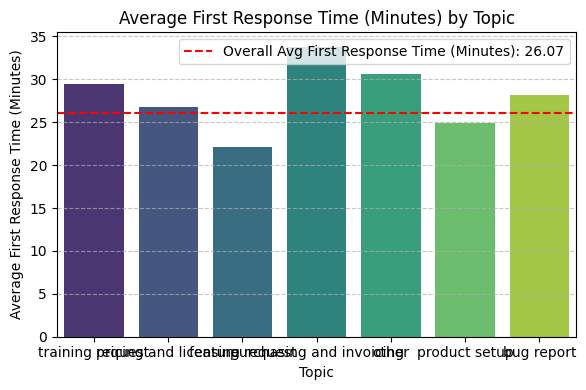

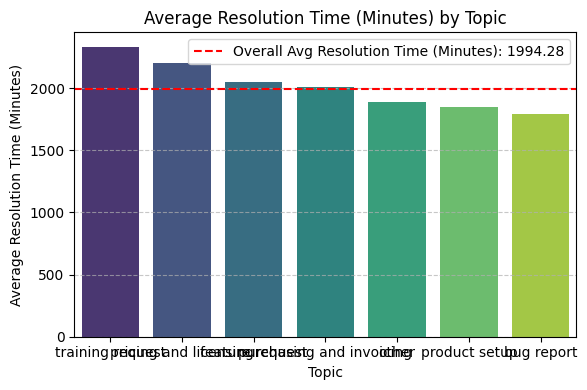

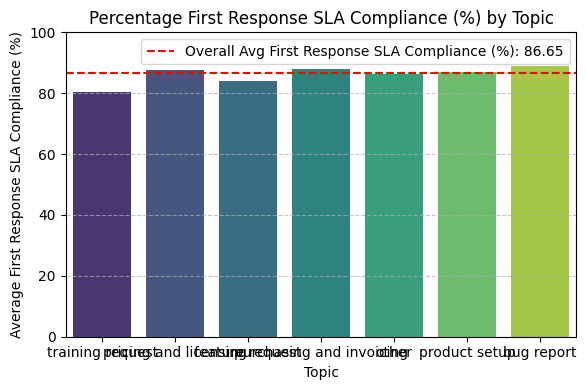

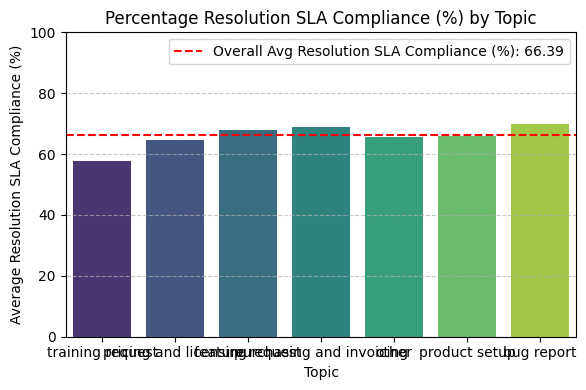

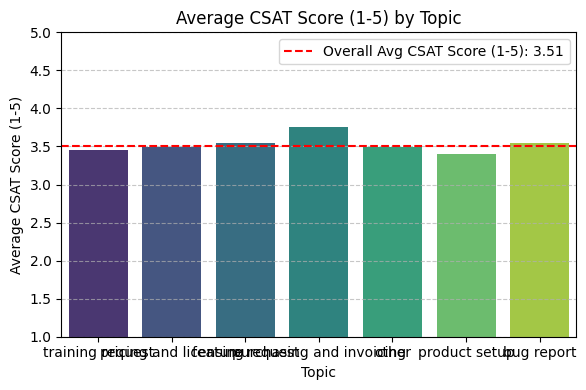

In [12]:
# Analyze Performance by "Topic" - understand what kind of issues are leading to these support requests and how their performance metrics vary.

# Group by 'Topic' and calculate the mean for key metrics
topic_performance = df.groupby('Topic').agg(
    Avg_First_Response_Minutes=('Actual_First_Response_Duration_Minutes', 'mean'),
    Avg_Resolution_Minutes=('Actual_Resolution_Duration_Minutes', 'mean'),
    First_Response_SLA_Compliance=('First_Response_SLA_Met', lambda x: x.mean() * 100),
    Resolution_SLA_Compliance=('Resolution_SLA_Met', lambda x: x.mean() * 100),
    Avg_CSAT=('Survey results', 'mean')
).round(2) # Round to 2 decimal places

# Sort by Avg_Resolution_Minutes
topic_performance_sorted_resolution = topic_performance.sort_values(by='Avg_Resolution_Minutes', ascending=False)

print("\n--- Performance Metrics by Topic (Sorted by Avg Resolution Time) ---")
print(topic_performance_sorted_resolution)
print("-----------------------------------------------------------------")

print("\n--- Visualizing Performance by Topic ---")

plot_performance_metrics(topic_performance_sorted_resolution, 'Topic', 'Avg_First_Response_Minutes', 'First Response Time (Minutes)', overall_avg_first_response, 'Average')
plot_performance_metrics(topic_performance_sorted_resolution, 'Topic', 'Avg_Resolution_Minutes', 'Resolution Time (Minutes)', overall_avg_resolution_time, 'Average')
plot_performance_metrics(topic_performance_sorted_resolution, 'Topic', 'First_Response_SLA_Compliance', 'First Response SLA Compliance (%)', overall_first_response_sla_compliance, 'Percentage', y_limit=(0, 100))
plot_performance_metrics(topic_performance_sorted_resolution, 'Topic', 'Resolution_SLA_Compliance', 'Resolution SLA Compliance (%)', overall_resolution_sla_compliance, 'Percentage', y_limit=(0, 100))
plot_performance_metrics(topic_performance_sorted_resolution, 'Topic', 'Avg_CSAT', 'CSAT Score (1-5)', overall_avg_csat, 'Average', y_limit=(1, 5))

Based on the based line average metrics, the performance on each Topic are:

| Metric                        | Training Request               | Pricing & Licensing            | Feature Request                | Purchasing & Invoicing           | Other                            | Product Setup                  | Bug Report                     |
| :---------------------------- | :----------------------------- | :----------------------------- | :----------------------------- | :------------------------------- | :------------------------------- | :----------------------------- | :----------------------------- |
| Avg_First_Response_Minutes    | 29.49                          | 26.79                          | 22.14 (Fastest)                | 33.79 (Slowest)                  | 30.67                            | 24.96                          | 28.12                          |
| Avg_Resolution_Minutes        | 2333.61 (Slowest) (~39h)       | 2199.96 (~36.6h)               | 2052.88 (~34.2h)               | 2006.31 (~33.4h)                 | 1888.12 (~31.4h)                 | 1846.14 (~30.7h)               | 1794.43 (Fastest) (~29.9h)     |
| First_Response_SLA_Compliance | 80.30%                         | 87.62%                         | 84.17%                         | 87.88% (Best)                    | 86.21%                           | 86.98%                         | 88.89% (Best)                  |
| Resolution_SLA_Compliance     | 57.58% (Lowest)                | 64.57%                         | 67.87%                         | 68.94% (Best)                    | 65.52%                           | 65.87%                         | 69.78% (Best)                  |
| Avg_CSAT                      | 3.46 (Lowest)                  | 3.49                           | 3.54                           | 3.75 (Highest)                   | 3.49                             | 3.40 (Lowest)                  | 3.55                           |

**Key Insights from Topic Analysis:**

1 - Challenging Topics (Long Resolution, Low CSAT/SLA):
- training request: This topic stands out as the most problematic. It has the longest average resolution time (nearly 2 days!), the lowest Resolution SLA compliance, and one of the lowest CSAT scores. This suggests training requests are complex, resource-intensive, or poorly handled.
- pricing and licensing: Also has a very long resolution time and lower CSAT, indicating it's a difficult area.

2 - Relatively Efficient Topics (Faster Resolution, Better SLA/CSAT):
- bug report and product setup: These topics tend to have the fastest resolution times. Bug report also has high First Response and Resolution SLA compliance.
- purchasing and invoicing: While not the fastest to resolve, it achieves the highest CSAT score and strong SLA compliance. This suggests that even if it takes a bit longer, customers are satisfied with the outcome or the communication during the process.

3 - Discrepancy: Speed vs. Satisfaction:
- product setup has fast resolution but one of the lowest CSAT scores (3.40). This is interesting – perhaps customers expect even faster service for setups, or the resolution process itself (even if quick) is frustrating.
- purchasing and invoicing is mid-range on resolution time but very high on CSAT.

**Initial Recommendations for SwiftConnect (based on Topic):**

> Focus on training request & pricing and licensing: These topics require immediate attention. Investigate the root causes of their long resolution times and low satisfaction. This could involve:

> - Dedicated training for agents on these specific issues.
> - Developing standardized escalation paths or knowledge base articles.
> - Potentially moving them to a higher support tier if complexity demands it.

> Review product setup process: Understand why despite relatively quick resolution, customer satisfaction is low. Is the solution clear? Are instructions easy to follow?

> Learn from purchasing and invoicing: Analyze the handling of these tickets. What makes customers so satisfied, even with mid-range resolution times? Can these practices be applied elsewhere?



--- Performance Metrics by Agent Group ---
                  Avg_First_Response_Minutes  Avg_Resolution_Minutes  \
Agent Group                                                            
1st line support                       25.57                 2044.53   
2nd line support                       30.70                 1837.89   

                  First_Response_SLA_Compliance  Resolution_SLA_Compliance  \
Agent Group                                                                  
1st line support                          86.84                      65.48   
2nd line support                          86.07                      69.29   

                  Avg_CSAT  
Agent Group                 
1st line support      3.54  
2nd line support      3.41  
----------------------------------------

--- Visualizing Performance by Agent Group ---


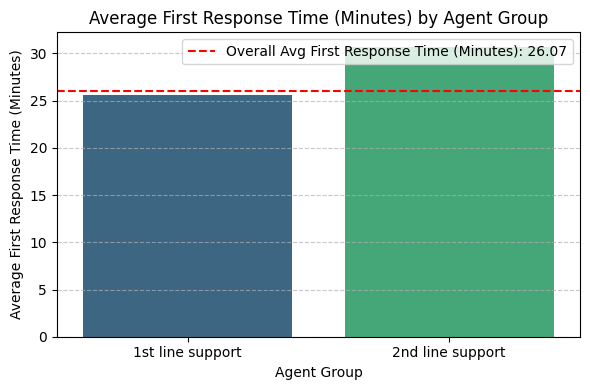

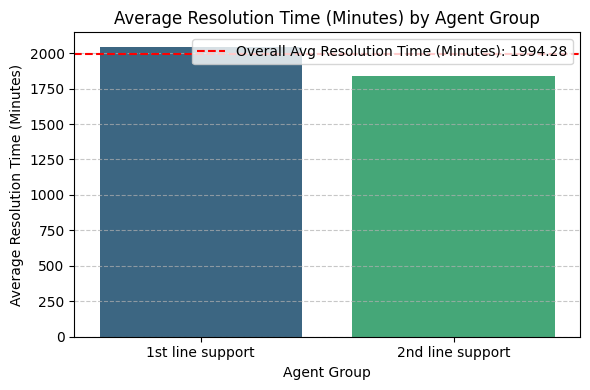

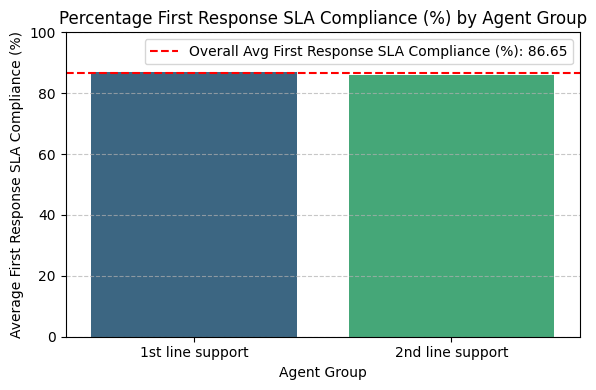

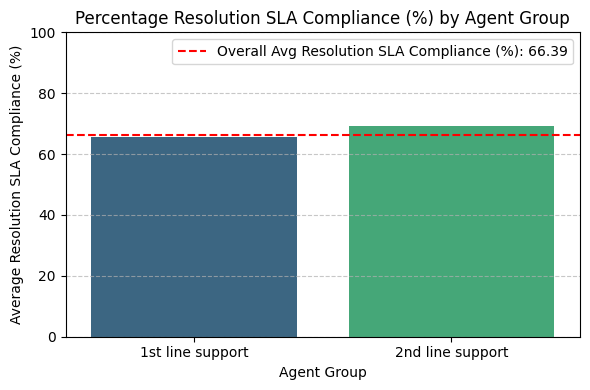

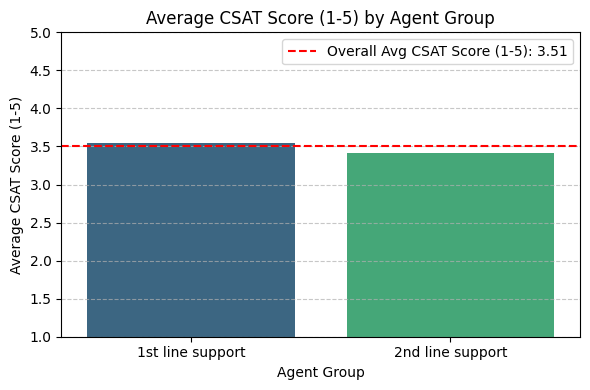

In [15]:
# Analyze Performance by "Topic" - insight into the efficiency and effectiveness of our tiered support structure.

# Group by 'Agent Group' and calculate the mean for key metrics
agent_group_performance = df.groupby('Agent Group').agg(
    Avg_First_Response_Minutes=('Actual_First_Response_Duration_Minutes', 'mean'),
    Avg_Resolution_Minutes=('Actual_Resolution_Duration_Minutes', 'mean'),
    First_Response_SLA_Compliance=('First_Response_SLA_Met', lambda x: x.mean() * 100),
    Resolution_SLA_Compliance=('Resolution_SLA_Met', lambda x: x.mean() * 100),
    Avg_CSAT=('Survey results', 'mean')
).round(2) # Round to 2 decimal places

print("\n--- Performance Metrics by Agent Group ---")
print(agent_group_performance)
print("----------------------------------------")

# --- Visualizing Performance by Agent Group ---
print("\n--- Visualizing Performance by Agent Group ---")

plot_performance_metrics(agent_group_performance, 'Agent Group', 'Avg_First_Response_Minutes', 'First Response Time (Minutes)', overall_avg_first_response, 'Average')
plot_performance_metrics(agent_group_performance, 'Agent Group', 'Avg_Resolution_Minutes', 'Resolution Time (Minutes)', overall_avg_resolution_time, 'Average')
plot_performance_metrics(agent_group_performance, 'Agent Group', 'First_Response_SLA_Compliance', 'First Response SLA Compliance (%)', overall_first_response_sla_compliance, 'Percentage', y_limit=(0, 100))
plot_performance_metrics(agent_group_performance, 'Agent Group', 'Resolution_SLA_Compliance', 'Resolution SLA Compliance (%)', overall_resolution_sla_compliance, 'Percentage', y_limit=(0, 100))
plot_performance_metrics(agent_group_performance, 'Agent Group', 'Avg_CSAT', 'CSAT Score (1-5)', overall_avg_csat, 'Average', y_limit=(1, 5))


Based on the based line average metrics, the performance on each Agent Group are:

| Metric                        | 1st Line Support             | 2nd Line Support               | Overall Context                                                         |
| :---------------------------- | :--------------------------- | :----------------------------- | :---------------------------------------------------------------------- |
| Avg_First_Response_Minutes    | 25.57 (Faster)               | 30.70                          | Overall: 26.07 mins. (1st line is faster, as expected)                 |
| First_Response_SLA_Compliance | 86.84%                       | 86.07%                         | Overall: 86.65%. (Both are very similar, close to overall)             |
| Avg_Resolution_Minutes        | 2044.53 (~34.07 hrs)         | 1837.89 (Faster) (~30.63 hrs)  | Overall: 1994.28 mins (33.24 hrs). (2nd line resolves faster, as expected for complex issues) |
| Resolution_SLA_Compliance     | 65.48%                       | 69.29% (Better)                | Overall: 66.39%. (2nd line has better resolution compliance)           |
| Avg_CSAT                      | 3.54 (Higher)                | 3.41 (Lower)                   | Overall: 3.51. (1st line achieves higher satisfaction)                 |

**Key Insights from Agent Group Analysis:**

1 - Tier Efficiency:

- 1st Line Support: As expected, they are slightly faster on initial response, which makes sense as they are the first point of contact. They also achieve a higher CSAT score.
- 2nd Line Support: They resolve tickets, on average, about 3.4 hours faster than 1st line support, and achieve a higher resolution SLA compliance. This indicates they are more efficient at resolving the complex issues escalated to them. This is typical and desirable in a tiered system.

2 - CSAT Discrepancy:

- It's interesting that 1st line support achieves a higher CSAT (3.54) than 2nd line support (3.41), despite 2nd line handling more complex issues and resolving them faster. This could suggest:
    - Customers might be more satisfied with basic, quick resolutions from 1st line.
    - The frustration of an issue escalating to 2nd line, or the complexity itself, might lower satisfaction, even if resolved efficiently.
    - The "hand-off" experience between tiers might be an area for improvement.

**Recommendations for SwiftConnect (based on Agent Group):**

> Acknowledge 2nd Line Efficiency: Recognize 2nd line support's effectiveness in resolving complex issues faster and with better SLA compliance.

> Investigate 2nd Line CSAT: Look into the customer journey for tickets that reach 2nd line. Are expectations managed well during escalation? Is communication clear? Can the "hand-off" process be smoother?

> Leverage 1st Line CSAT: Understand what contributes to 1st line's higher CSAT and explore if any of those elements can be applied to 2nd line support interactions.



Thoroughly analyzed performance by Source, Priority, Topic and Agent Group. These are fantastic insights into what, where and by whom issues are being handled.

Next is **Time-Based Analysis**. This will help us understand the demand patterns and workload distribution throughout the week and day. This is critical for staffing and operational planning.
- Analyze Ticket Volume and Average Metrics by Created_Hour_of_Day and Created_Day_of_Week_Name

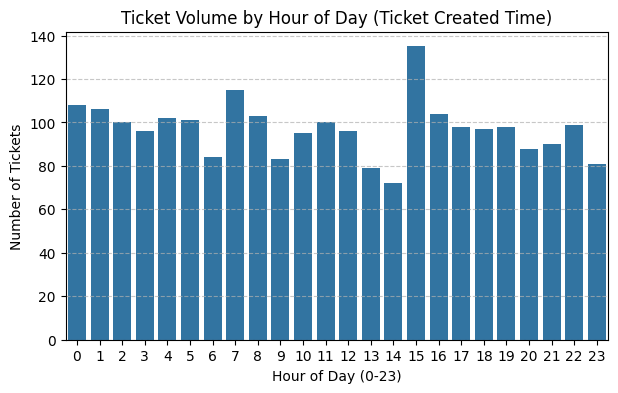

In [ ]:
# 1. Ticket Volume by Hour of Day
plt.figure(figsize=(7, 4))
sns.countplot(x='Created_Hour_of_Day', data=df)
plt.title('Ticket Volume by Hour of Day (Ticket Created Time)')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Tickets')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Ticket Volume by Hour of Day (Insights):**

- Relatively Consistent Volume, but with a Clear Peak:
    - Most hours hover around 80-110 tickets.
    - There's a noticeable peak around 15:00 (3 PM) with 135 tickets. This could indicate a surge in activity late in the typical workday for a standard time zone.
    - Other slightly higher periods are early morning (0:00-5:00 AM, which is interesting for potential international customers or 24/7 usage) and late morning (7:00-8:00 AM).

- Slight Dips:
    - The lowest volumes appear around 06:00 (84 tickets), 09:00 (83 tickets), 13:00 (79 tickets), and 14:00 (72 tickets). The dip at 13:00-14:00 could be a lunch break effect if this relates to a specific business timezone.

**Takeaway:**
> SwiftConnect experiences its highest ticket creation volume in the mid-afternoon (3 PM). The relatively high volume during early morning hours (0:00-5:00 AM) might suggest a significant international customer base or round-the-clock service usage.



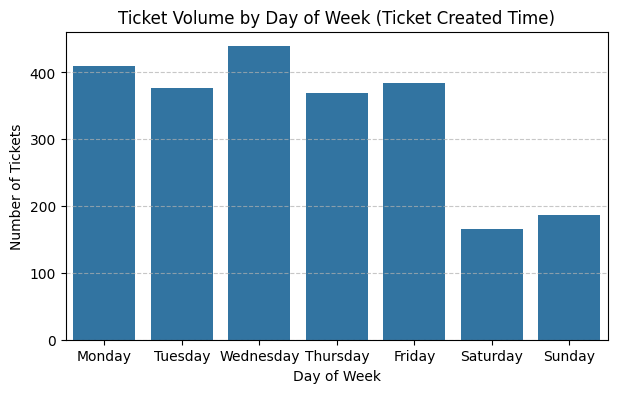

In [ ]:
# 2. Ticket Volume by Day of Week:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(7, 4))
sns.countplot(x='Created_Day_of_Week_Name', data=df, order=day_order)
plt.title('Ticket Volume by Day of Week (Ticket Created Time)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Tickets')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Ticket Volume by Day of Week (Insights):**

1 - Clear Weekday Dominance:
- The vast majority of tickets are created on weekdays, with Wednesday having the highest volume (439 tickets), followed closely by Monday (410 tickets).
- Tuesday, Thursday, and Friday show moderately high volumes, staying above 360 tickets.

2 - Significant Weekend Drop:
- There's a very sharp drop in ticket volume during the weekend. Saturday (165 tickets) and Sunday (186 tickets) are significantly slower, accounting for a much smaller portion of the total tickets. This is a common pattern for many businesses.

**Takeaway:** 
> SwiftConnect's support team experiences peak demand mid-week (Wednesday) and at the start of the week (Monday). Weekend demand drops considerably, which is typical for a B2B or weekday-focused service, or reflects customer behavior on personal time.

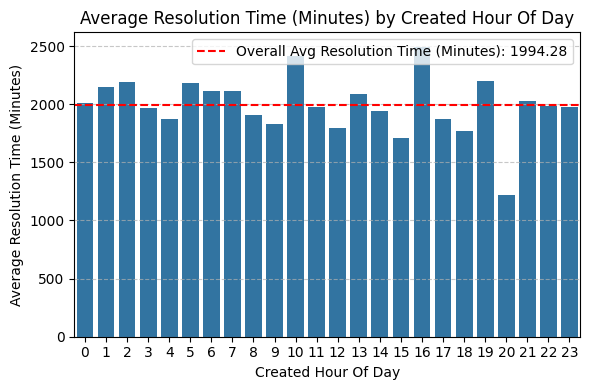

In [37]:
# 3. Average Resolution Time by Hour of Day
plot_performance_metrics(hourly_performance, 'Created_Hour_of_Day', 'Avg_Resolution_Minutes', 'Resolution Time (Minutes)', overall_avg_resolution_time, 'Average')

**Average Resolution Time  by Created Hour of Day (Insights):**

1 -  Slowest Resolution Hours: Tickets created at 16:00 (4 PM) (2493.10 minutes) and 10:00 (10 AM) (2415.56 minutes) have the longest average resolution times, significantly higher than the overall average of 1994.28 minutes. This suggests potential bottlenecks or challenges during these hours.

2 - Fastest Resolution Hours: Tickets created at 20:00 (8 PM) (1216.67 minutes) and 15:00 (3 PM) (1705.00 minutes) have noticeably faster average resolution times. It's interesting that 15:00 was a peak volume hour, but resolution is relatively fast. The 20:00 time is significantly faster, suggesting less workload or more efficient agents during that time.

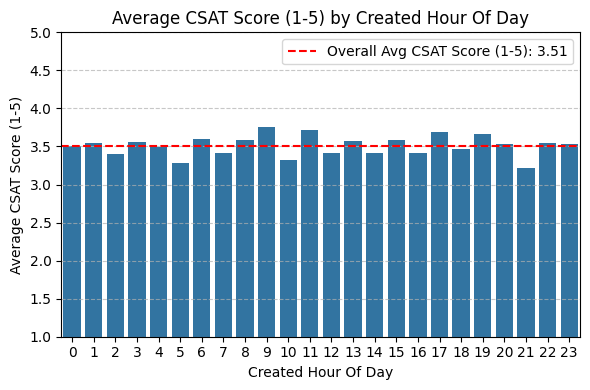

In [38]:
# 4. Average CSAT by Hour of Day
plot_performance_metrics(hourly_performance, 'Created_Hour_of_Day', 'Avg_CSAT', 'CSAT Score (1-5)', overall_avg_csat, 'Average', y_limit=(1, 5))

**Average CSAT by Created Hour of Day (Insights):**
- Highest CSAT Hours: Tickets created at 09:00 (9 AM) (3.76) and 11:00 (11 AM) (3.71) generally lead to higher customer satisfaction.
- Lowest CSAT Hours: Tickets created at 05:00 (5 AM) (3.28) and 10:00 (10 AM) (3.32) result in lower customer satisfaction.

**Take away for Resolution time and CSAT by Created Hour of Day:**
- The 10:00 hour is a definite problem spot: it has very high resolution times AND low CSAT. This is a clear area for SwiftConnect to investigate.
- Conversely, 09:00 has above-average CSAT and slightly below-average resolution time, which is a good combination.
- 20:00 shows very fast resolution, but the CSAT (3.53) is just around the overall average. This could mean that while speed is important, other factors influence satisfaction.

> The time of day a ticket is created significantly impacts its resolution speed and customer satisfaction. SwiftConnect should investigate bottlenecks at 10 AM and 4 PM, and understand why 8 PM and 3 PM are more efficient. The low CSAT in early morning (5 AM) and mid-morning (10 AM) is also a concern.


Performance Metrics by Created Day of Week:
                          Avg_Resolution_Minutes
Created_Day_of_Week_Name                        
Monday                                   1980.23
Tuesday                                  2022.93
Wednesday                                1999.96
Thursday                                 1857.54
Friday                                   2063.49
Saturday                                 2103.13
Sunday                                   1975.87
   Overall Avg Resolution: 1994.28 minutes
---------------------------------------------


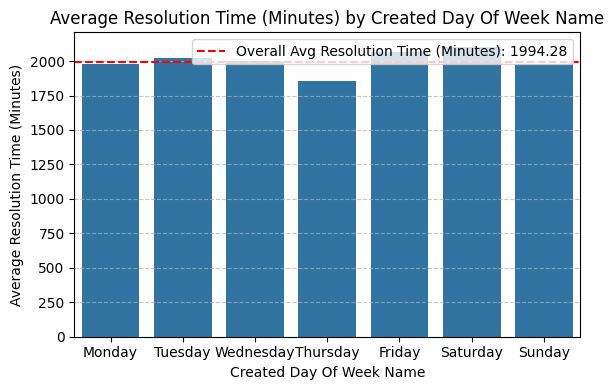

In [42]:
# 5 . Average Resolution Time by Day of Week

daily_performance = df.groupby(['Created_Day_of_Week_Num', 'Created_Day_of_Week_Name']).agg(
    Avg_Resolution_Minutes=('Actual_Resolution_Duration_Minutes', 'mean'),
    Avg_CSAT=('Survey results', 'mean')
).round(2).reset_index().set_index('Created_Day_of_Week_Name').sort_values(by='Created_Day_of_Week_Num')

print("\nPerformance Metrics by Created Day of Week:")
print(daily_performance[['Avg_Resolution_Minutes']])
print(f"   Overall Avg Resolution: {overall_avg_resolution_time:.2f} minutes")

print("---------------------------------------------")

plot_performance_metrics(daily_performance, 'Created_Day_of_Week_Name', 'Avg_Resolution_Minutes', 'Resolution Time (Minutes)', overall_avg_resolution_time, 'Average')

**Average Resolution Time by Created Day of Week Insights:**
- Fastest Resolution Days: Tickets created on Thursday (1857.54 minutes) have the fastest average resolution time, significantly better than the overall average. This could indicate higher efficiency, lower complexity tickets, or better staffing on Thursdays.
- Slowest Resolution Days: Tickets created on Saturday (2103.13 minutes) and Friday (2063.49 minutes) have the longest average resolution times. This is particularly concerning for Saturday, which also has lower ticket volume, suggesting potential staffing issues or a backlog accumulation over the weekend.

**Take away:**
> SwiftConnect seems to be most efficient at resolving tickets created on Thursdays, but struggles with those created towards the end of the work week and on Saturdays.


Average CSAT by Created Day of Week:
                          Avg_CSAT
Created_Day_of_Week_Name          
Monday                        3.60
Tuesday                       3.50
Wednesday                     3.36
Thursday                      3.51
Friday                        3.64
Saturday                      3.40
Sunday                        3.52
   Overall Avg CSAT: 3.51
---------------------------------------------


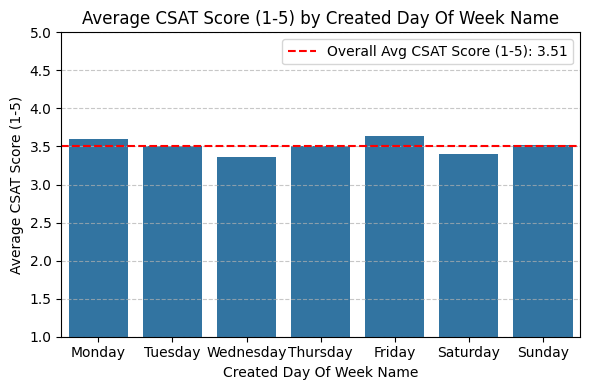

In [46]:
# 6. Average CSAT by Day of Week:

print("\nAverage CSAT by Created Day of Week:")
print(daily_performance[['Avg_CSAT']])
print(f"   Overall Avg CSAT: {overall_avg_csat:.2f}")

print("---------------------------------------------")

plot_performance_metrics(daily_performance, 'Created_Day_of_Week_Name', 'Avg_CSAT', 'CSAT Score (1-5)', overall_avg_csat, 'Average', y_limit=(1, 5))

**Completed picture for Created Day of Week, combining ticket volume, average resolution time, and average CSAT.

| Created_Day_of_Week_Name | Ticket Volume          | Avg_Resolution_Minutes       | Avg_CSAT            | Observations                                                                                                                                                                                                                                                                          |
| :----------------------- | :--------------------- | :--------------------------- | :------------------ | :-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Monday** | 410 (High)             | 1980.23 (Avg)                | 3.60 (Highest)      | Strong start to the week: High volume, average resolution, but **highest CSAT**. Suggests agents manage to satisfy customers despite the initial Monday rush.                                                                                                            |
| **Tuesday** | 377 (High)             | 2022.93 (Avg)                | 3.50                | High volume continues, resolution time slightly above average, CSAT is average.                                                                                                                                                                                       |
| **Wednesday** | 439 (Highest)          | 1999.96 (Avg)                | 3.36 (Lowest)       | **Highest volume day**, but resolution time is just average, and critically, **CSAT is the lowest**. This is a major concern: peak demand leads to lowest customer satisfaction.                                                                                  |
| **Thursday** | 369 (High)             | 1857.54 (Fastest)            | 3.51                | **Excellent efficiency**: Lowest resolution time among weekdays, and average CSAT. This is a day to learn from.                                                                                                                                                       |
| **Friday** | 384 (High)             | 2063.49 (Slowest Weekday)    | 3.64 (Second Highest) | **Interesting paradox**: Longest weekday resolution time, but second highest CSAT. This could imply that customers are more forgiving towards the end of the week, or agents provide excellent service despite the longer time.                                      |
| **Saturday** | 165 (Lowest)           | 2103.13 (Slowest Overall)    | 3.40 (Second Lowest) | The **lowest volume day**, yet has the **longest resolution time overall** and low CSAT. This is a **significant operational concern**, indicating potential understaffing or backlogs accumulating on weekends.                                                  |
| **Sunday** | 186 (Low)              | 1975.87 (Avg)                | 3.52                | Low volume, average resolution, average CSAT. Better than Saturday, suggesting perhaps slightly better weekend staffing or less complex issues.                                                                                                               |


**Key Insights from Day of Week Analysis:**
> Wednesday Bottleneck: This is the most critical finding. It's the busiest day, but results in the lowest CSAT. This suggests that SwiftConnect's support system (staffing, processes) might be overwhelmed by peak demand on Wednesdays, leading to a poorer customer experience.

> Weekend Struggles: Despite low volume, Saturday has the longest resolution times and low CSAT. This points to a potential understaffing issue or reduced operational capacity during weekends, leading to poor service for the customers who do contact support.

> Thursday Efficiency: Thursdays stand out for their efficiency in resolution. SwiftConnect should analyze what makes Thursdays so effective and try to replicate those conditions.

> Friday Paradox: Good CSAT despite slow resolution on Fridays is peculiar. It might be due to lower customer expectations, or perhaps more focused, quality interactions from agents who are wrapping up the week.

**Completed the analysis of performance by all major categorical variables and time-based trends! A comprehensive look at where and when issues arise and how performance is impacted.**

Next, exploring relationships between numerical variables. This will help understanding if certain operational aspects directly influence others. For instance:

- Does a higher number of Agent interactions correlate with longer resolution times?
- Does longer resolution time lead to lower Survey results?

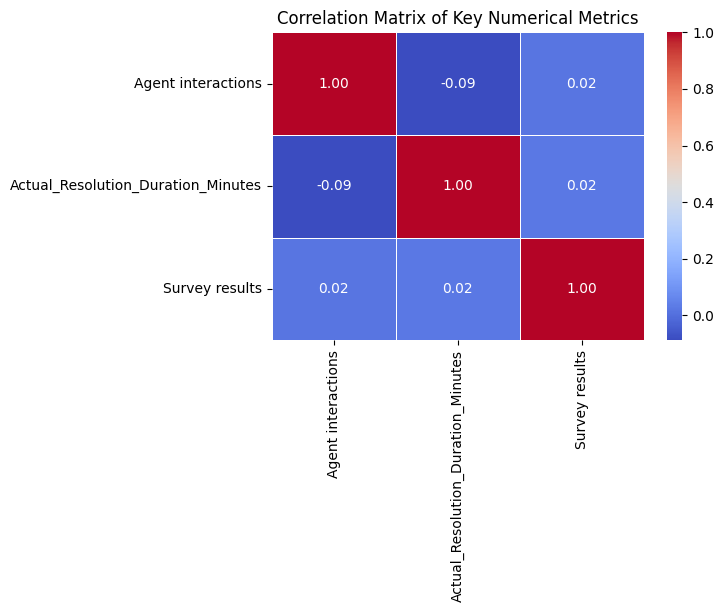

In [55]:
### Analyze Relationships Between Key Numerical Metrics
#   Investigate the relationships between:
#    1 - Agent interactions
#    2 - Actual_Resolution_Duration_Minutes
#    3 - Survey results  

#  Correlation matrix for the three columns: Agent interactions, Actual_Resolution_Duration_Minutes, and Survey results.

relationship_cols = ['Agent interactions', 'Actual_Resolution_Duration_Minutes', 'Survey results']
df_relationship = df[relationship_cols].dropna()
correlation_matrix = df_relationship.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Key Numerical Metrics')
plt.show()

**Takeaway from the Correlation Matrix:**
> The correlations between these three key operational metrics are generally very weak, almost negligible. This suggests that, individually, Agent interactions, Actual_Resolution_Duration_Minutes, and Survey results do not have strong linear predictive power over each other in this dataset. 


Scatter Plot - Resolution Duration vs. Agent Interactions


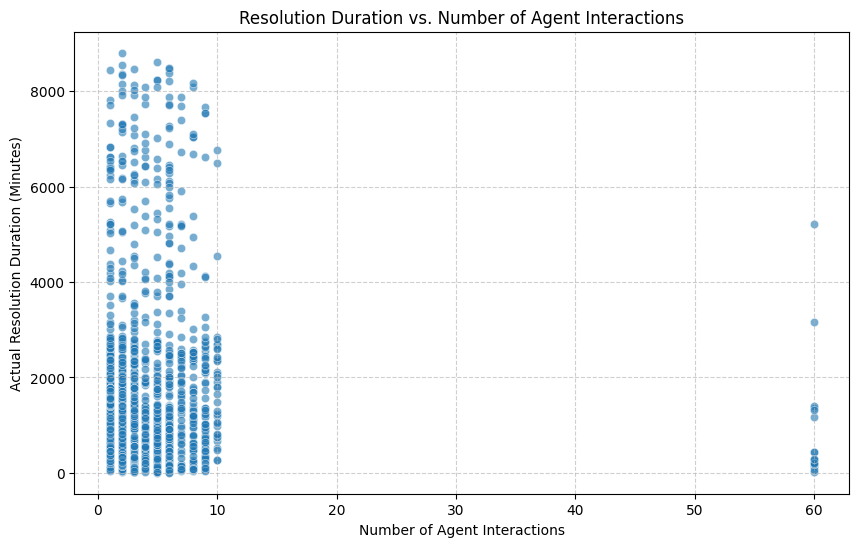

In [56]:
# Scatter Plots for Key Relationships 
# Actual_Resolution_Duration_Minutes vs. Agent interactions

print("\nScatter Plot - Resolution Duration vs. Agent Interactions")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Agent interactions', y='Actual_Resolution_Duration_Minutes', data=df_relationship, alpha=0.6)
plt.title('Resolution Duration vs. Number of Agent Interactions')
plt.xlabel('Number of Agent Interactions')
plt.ylabel('Actual Resolution Duration (Minutes)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Key Insight:**
> The plot strongly suggests that the number of agent interactions by itself is not a primary driver of resolution duration for SwiftConnect Telecom. Even tickets with very few interactions can take a very long time to resolve. 

> This reinforces our earlier idea that other factors (like the complexity of the Topic, the need for customer input, or waiting on external systems/Tier 2 support) are much more influential on how long a ticket sits in the system than the sheer count of agent messages.


Scatter Plot - Resolution Duration vs. CSAT


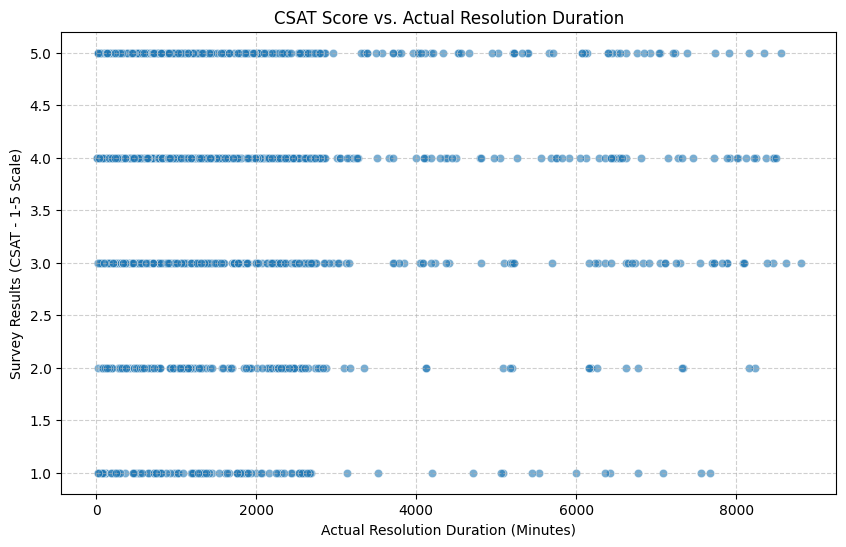

In [58]:
# Actual_Resolution_Duration_Minutes vs. Survey results (CSAT)

print("\nScatter Plot - Resolution Duration vs. CSAT")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual_Resolution_Duration_Minutes', y='Survey results', data=df_relationship, alpha=0.6)
plt.title('CSAT Score vs. Actual Resolution Duration')
plt.xlabel('Actual Resolution Duration (Minutes)')
plt.ylabel('Survey Results (CSAT - 1-5 Scale)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Key Insight:**
> The plot provides strong evidence that the duration of resolution is not the primary factor determining customer satisfaction for SwiftConnect Telecom. Customers can be highly satisfied even with very long resolution times, and highly dissatisfied even with quick resolutions. This strongly suggests that other, perhaps more qualitative, factors are at play, such as:
> - The quality of the resolution itself (was the problem truly fixed?).
> - The effectiveness of communication during the resolution process (were updates provided? Was the agent empathetic?).
> - The customer's initial expectations and whether they were managed well.
> - The nature of the issue (Topic) – perhaps complex issues, even if lengthy, are accepted if resolved well.

**Exploratory Data Analysis (EDA) & Insights Conclusion**

-  Systematically explored your data, generated key performance metrics, analyzed performance by major categorical variables (Source, Priority, Topic, Agent Group), investigated time-based trends, and examined relationships between key numerical metrics.

**Critical insights:**
> **Phone channel is an area of concern (slowest resolution, lowest CSAT).**

> **Priority management has issues (Medium is slowest overall, Low is faster than High for resolution).**

> **Wednesday is a bottleneck day (highest volume, lowest CSAT).**

> **Saturday is an efficiency concern (lowest volume, slowest resolution).**

> **Specific topics like 'training request' and 'pricing & licensing' are problematic due to long resolution times and low CSAT.**

> **Resolution duration itself is not a strong linear predictor of CSAT; other factors are more influential.**
